# Library

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
from astroML.utils import completeness_contamination
from sklearn.metrics import precision_recall_curve, roc_curve
from astroML.utils import split_samples, completeness_contamination
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve#
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import itertools
import datetime
from pandas.plotting import scatter_matrix

# Load File

In [2]:
big_frame = pd.read_csv("big_frame_1.csv")
type_ID = big_frame['type_ID']
# big_frame = big_frame.drop(big_frame.loc[:,'type_ID'].head(0).columns, axis=1)
big_frame.drop('type_ID', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(big_frame,type_ID, random_state=None)
# Create standardizer
standardizer = StandardScaler()
standardizer.fit(X_train)
# Standardize features
X_std_train = standardizer.fit_transform(X_train)
X_std_test = standardizer.fit_transform(X_test)
# Standardize features
minmax = MinMaxScaler()
minmax.fit(X_train)
X_mm_train = minmax.fit_transform(X_train)
X_mm_test = minmax.fit_transform(X_test)

# Function

In [3]:
def print_score (y_test,y_pred,time1,time2):
    print("comfusion matrix = ")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    print("")
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy_score = ', accuracy)

#In multilabel classification, 
#this function computes subset accuracy: the set of labels predicted for 
#a sample must exactly match the corresponding set of labels in y_true     
    
    print("")
    completeness, contamination = completeness_contamination(y_pred, y_test)
    print ("completeness = ", completeness)
    print ("contamination = ", contamination)
    
#completeness = true positives/true positives + false negatives,
#contamination = false positives/true positives + false positives.
#The completeness measures the fraction of total detections identified by our classifier,
#while the contamination measures the fraction of detected objects which are misclassified

# Depending on the nature of the problem and the goal of the classification,
# we may wish to optimize one or the other.
# Alternative names for these measures abound: in some fields the completeness
# and contamination are respectively referred to as the “sensitivity” and the “Type I
# error.” In astronomy, one minus the contamination is often referred to as the
# “efficiency.” In machine learning communities, the efficiency and completeness are
# respectively referred to as the “precision” and “recall.”

    print("")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print ("precision score = ", precision)
    print ("recall score = ", recall)

#precision An interesting one to look at is the accuracy of the positive pre‐ dictions; this is called the precision of the classifier 
# recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier
#precision = TP/TP + FP
#recall = TP/TP + FN
    
    print("")
    f1 = f1_score(y_test, y_pred)
    print ("F1 score = ", f1)
    
#The F1 score is the harmonic mean of precision and recall (Equation 3-3). 
#Whereas the regular mean treats all values equally, 
#the harmonic mean gives much more weight to low values.

    print("")
    print ("time span= ", time2 - time1)

In [4]:
def score (y_test,y_pred,time1,time2):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    completeness, contamination = completeness_contamination(y_pred, y_test)
    completeness = np.max(completeness)
    contamination = np.max(contamination)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time = time2 - time1
    return(cm,accuracy,completeness,contamination,precision,recall,f1,time)

In [5]:
feature= ['Width','Height','Orientation','Eccentricity','Variance_x','Variance_y','Covariance','Intensity_x',
                     'mean_x','sigma_x','RMS_x','Intensity_y','mean_y','sigma_y','RMS_y',
                     'psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z',
                     'psfMagErr_u','psfMagErr_g','psfMagErr_r','psfMagErr_i','psfMagErr_z',
                     'cModelMag_u','cModelMag_g','cModelMag_r','cModelMag_i','cModelMag_z',
                     'cModelMagErr_u','cModelMagErr_g','cModelMagErr_r','cModelMagErr_i',
                     'cModelMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z',
                     'petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z',
                     'psf-cM_Mag_u','psf-cM_Mag_g','psf-cM_Mag_r','psf-cM_Mag_i','psf-cM_Mag_z']

# Stochastic Gradient Descent (SGD)

In [40]:
time1_sgd_0 = datetime.datetime.now()
sgd_0 = SGDClassifier(random_state=None,loss='hinge', penalty='l2',
                      learning_rate='optimal',class_weight=None,alpha=0.0001)
model_sgd_0 = sgd_0.fit(X_std_train, y_train)
y_sgd_0 = model_sgd_0.predict(X_std_test)
cal_0 = CalibratedClassifierCV(model_sgd_0, cv='prefit')
model_cc_sgd_0 = cal_0.fit(X_std_train, y_train)
y_probs_sgd_0 = model_cc_sgd_0.predict_proba(X_std_test)[:, 1]
time2_sgd_0 = datetime.datetime.now()
print_score(y_test,y_sgd_0,time1_sgd_0,time2_sgd_0)

comfusion matrix = 
[[2694  161]
 [  85 4153]]

accuracy_score =  0.9653179190751445

completeness =  0.9799433695139217
contamination =  0.03732035234121465

precision score =  0.9626796476587853
recall score =  0.9799433695139217

F1 score =  0.9712347988774556

time span=  0:00:00.196447


In [41]:
time1_sgd_1 = datetime.datetime.now()
sgd_1 = SGDClassifier(random_state=None,loss='hinge', penalty='l1',
                      learning_rate='optimal',class_weight=None,alpha=0.0001)
model_sgd_1 = sgd_1.fit(X_std_train, y_train)
y_sgd_1 = model_sgd_1.predict(X_std_test)
cal_1 = CalibratedClassifierCV(model_sgd_1, cv='prefit')
model_cc_sgd_1 = cal_1.fit(X_std_train, y_train)
y_probs_sgd_1 = model_cc_sgd_1.predict_proba(X_std_test)[:, 1]
time2_sgd_1 = datetime.datetime.now()
print_score(y_test,y_sgd_1,time1_sgd_1,time2_sgd_1)

comfusion matrix = 
[[2631  224]
 [ 384 3854]]

accuracy_score =  0.9142816861694628

completeness =  0.9093912222746579
contamination =  0.05492888670917116

precision score =  0.9450711132908288
recall score =  0.9093912222746579

F1 score =  0.9268879268879269

time span=  0:00:00.512673


E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibra

In [42]:
time1_sgd_2 = datetime.datetime.now()
sgd_2 = SGDClassifier(random_state=None,loss='hinge', penalty=None,
                      learning_rate='optimal',alpha=0.0001)
model_sgd_2 = sgd_2.fit(X_std_train, y_train)
y_sgd_2 = model_sgd_2.predict(X_std_test)
cal_2 = CalibratedClassifierCV(model_sgd_2, cv='prefit')
model_cc_sgd_2 = cal_2.fit(X_std_train, y_train)
y_probs_sgd_2 = model_cc_sgd_2.predict_proba(X_std_test)[:, 1]
time2_sgd_2 = datetime.datetime.now()
print_score(y_test,y_sgd_2,time1_sgd_2,time2_sgd_2)

comfusion matrix = 
[[1720 1135]
 [1192 3046]]

accuracy_score =  0.671930071901875

completeness =  0.7187352524775837
contamination =  0.27146615642190863

precision score =  0.7285338435780914
recall score =  0.7187352524775837

F1 score =  0.7236013778358475

time span=  0:00:00.237856


E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


In [43]:
time1_sgd_3 = datetime.datetime.now()
sgd_3 = SGDClassifier(random_state=None,loss='log', penalty='l2',
                      learning_rate='optimal',alpha=0.0001)
model_sgd_3 = sgd_3.fit(X_std_train, y_train)
y_sgd_3 = model_sgd_3.predict(X_std_test)
y_probs_sgd_3 = model_sgd_3.predict_proba(X_std_test)[:, 1]
time2_sgd_3 = datetime.datetime.now()
print_score(y_test,y_sgd_3,time1_sgd_3,time2_sgd_3)

comfusion matrix = 
[[2714  141]
 [  99 4139]]

accuracy_score =  0.9661638234879458

completeness =  0.9766399244926852
contamination =  0.03294392523364486

precision score =  0.9670560747663551
recall score =  0.9766399244926852

F1 score =  0.9718243719182907

time span=  0:00:00.193115


In [44]:
time1_sgd_4 = datetime.datetime.now()
sgd_4 = SGDClassifier(random_state=None,loss='log', penalty='l1',
                      learning_rate='optimal',alpha=0.0001)
model_sgd_4 = sgd_4.fit(X_std_train, y_train)
y_sgd_4 = model_sgd_4.predict(X_std_test)
y_probs_sgd_4 = model_sgd_4.predict_proba(X_std_test)[:, 1]
time2_sgd_4 = datetime.datetime.now()
print_score(y_test,y_sgd_4,time1_sgd_4,time2_sgd_4)

comfusion matrix = 
[[2279  576]
 [ 527 3711]]

accuracy_score =  0.8444945721133512

completeness =  0.8756488909863143
contamination =  0.13435969209237228

precision score =  0.8656403079076277
recall score =  0.8756488909863143

F1 score =  0.8706158357771261

time span=  0:00:00.443446


In [45]:
time1_sgd_5 = datetime.datetime.now()
sgd_5 = SGDClassifier(random_state=None,loss='log', penalty=None,
                      learning_rate='optimal',alpha=0.0001)
model_sgd_5 = sgd_5.fit(X_std_train, y_train)
y_sgd_5 = model_sgd_5.predict(X_std_test)
y_probs_sgd_5 = model_sgd_5.predict_proba(X_std_test)[:, 1]
time2_sgd_5 = datetime.datetime.now()
print_score(y_test,y_sgd_5,time1_sgd_5,time2_sgd_5)

comfusion matrix = 
[[2447  408]
 [ 525 3713]]

accuracy_score =  0.8684618638093895

completeness =  0.8761208117036338
contamination =  0.09900509585052172

precision score =  0.9009949041494782
recall score =  0.8761208117036338

F1 score =  0.8883837779638711

time span=  0:00:01.388785


In [46]:
time1_sgd_6 = datetime.datetime.now()
sgd_6 = SGDClassifier(random_state=None,loss='perceptron', penalty="l2",
                      learning_rate='optimal',alpha=0.0001)
model_sgd_6 = sgd_6.fit(X_std_train, y_train)
y_sgd_6 = model_sgd_6.predict(X_std_test)
cal_6 = CalibratedClassifierCV(model_sgd_6, cv='prefit')
model_cc_sgd_6 = cal_6.fit(X_std_train, y_train)
y_probs_sgd_6 = model_cc_sgd_6.predict_proba(X_std_test)[:, 1]
time2_sgd_6 = datetime.datetime.now()
print_score(y_test,y_sgd_6,time1_sgd_6,time2_sgd_6)

comfusion matrix = 
[[2743  112]
 [ 197 4041]]

accuracy_score =  0.9564359227407303

completeness =  0.9535158093440302
contamination =  0.02696845653744281

precision score =  0.9730315434625572
recall score =  0.9535158093440302

F1 score =  0.9631748301751877

time span=  0:00:00.154432


In [47]:
time1_sgd_7 = datetime.datetime.now()
sgd_7 = SGDClassifier(random_state=None,loss='perceptron', penalty='l1',
                      learning_rate='optimal',alpha=0.0001)
model_sgd_7 = sgd_7.fit(X_std_train, y_train)
y_sgd_7 = model_sgd_7.predict(X_std_test)
cal_7 = CalibratedClassifierCV(model_sgd_7, cv='prefit')
model_cc_sgd_7 = cal_7.fit(X_std_train, y_train)
y_probs_sgd_7 = model_cc_sgd_7.predict_proba(X_std_test)[:, 1]
time2_sgd_7 = datetime.datetime.now()
print_score(y_test,y_sgd_7,time1_sgd_7,time2_sgd_7)

comfusion matrix = 
[[1538 1317]
 [ 471 3767]]

accuracy_score =  0.7479204849851967

completeness =  0.88886267107126
contamination =  0.2590479937057435

precision score =  0.7409520062942565
recall score =  0.88886267107126

F1 score =  0.8081956661660588

time span=  0:00:00.256334


E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


In [48]:
time1_sgd_8 = datetime.datetime.now()
sgd_8 = SGDClassifier(random_state=None,loss='perceptron', penalty=None,
                      learning_rate='optimal',alpha=0.0001)
model_sgd_8 = sgd_8.fit(X_std_train, y_train)
y_sgd_8 = model_sgd_8.predict(X_std_test)
cal_8 = CalibratedClassifierCV(model_sgd_8, cv='prefit')
model_cc_sgd_8 = cal_8.fit(X_std_train, y_train)
y_probs_sgd_8 = model_cc_sgd_8.predict_proba(X_std_test)[:, 1]
time2_sgd_8 = datetime.datetime.now()
print_score(y_test,y_sgd_8,time1_sgd_8,time2_sgd_8)

comfusion matrix = 
[[2356  499]
 [ 525 3713]]

accuracy_score =  0.8556323135485691

completeness =  0.8761208117036338
contamination =  0.11847103513770181

precision score =  0.8815289648622981
recall score =  0.8761208117036338

F1 score =  0.8788165680473373

time span=  0:00:01.262509


E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibra

In [49]:
time1_sgd_9 = datetime.datetime.now()
sgd_9 = SGDClassifier(random_state=None,loss='squared_hinge', penalty="l2",
                      learning_rate='optimal',alpha=0.0001)
model_sgd_9 = sgd_9.fit(X_std_train, y_train)
y_sgd_9 = model_sgd_9.predict(X_std_test)
cal_9 = CalibratedClassifierCV(model_sgd_9, cv='prefit')
model_cc_sgd_9 = cal_9.fit(X_std_train, y_train)
y_probs_sgd_9 = model_cc_sgd_9.predict_proba(X_std_test)[:, 1]
time2_sgd_9 = datetime.datetime.now()
print_score(y_test,y_sgd_9,time1_sgd_9,time2_sgd_9)

comfusion matrix = 
[[2563  292]
 [ 155 4083]]

accuracy_score =  0.9369801212462991

completeness =  0.9634261444077395
contamination =  0.06674285714285715

precision score =  0.9332571428571429
recall score =  0.9634261444077395

F1 score =  0.9481017067223964

time span=  0:00:00.132647


E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


In [50]:
time1_sgd_10 = datetime.datetime.now()
sgd_10 = SGDClassifier(random_state=None,loss='perceptron', penalty='l1',
                      learning_rate='optimal',alpha=0.0001)
model_sgd_10 = sgd_10.fit(X_std_train, y_train)
y_sgd_10 = model_sgd_10.predict(X_std_test)
cal_10 = CalibratedClassifierCV(model_sgd_10, cv='prefit')
model_cc_sgd_10 = cal_10.fit(X_std_train, y_train)
y_probs_sgd_10 = model_cc_sgd_10.predict_proba(X_std_test)[:, 1]
time2_sgd_10 = datetime.datetime.now()
print_score(y_test,y_sgd_10,time1_sgd_10,time2_sgd_10)

comfusion matrix = 
[[1682 1173]
 [ 475 3763]]

accuracy_score =  0.7676582546172283

completeness =  0.887918829636621
contamination =  0.2376418152350081

precision score =  0.7623581847649918
recall score =  0.887918829636621

F1 score =  0.8203618923043383

time span=  0:00:01.598132


E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


In [51]:
time1_sgd_11 = datetime.datetime.now()
sgd_11 = SGDClassifier(random_state=None,loss='perceptron', penalty=None,
                      learning_rate='optimal',alpha=0.0001)
model_sgd_11 = sgd_11.fit(X_std_train, y_train)
y_sgd_11 = model_sgd_11.predict(X_std_test)
cal_11 = CalibratedClassifierCV(model_sgd_11, cv='prefit')
model_cc_sgd_11 = cal_11.fit(X_std_train, y_train)
y_probs_sgd_11 = model_cc_sgd_11.predict_proba(X_std_test)[:, 1]
time2_sgd_11 = datetime.datetime.now()
print_score(y_test,y_sgd_11,time1_sgd_11,time2_sgd_11)

comfusion matrix = 
[[1532 1323]
 [ 388 3850]]

accuracy_score =  0.758776258282814

completeness =  0.9084473808400189
contamination =  0.2557510148849797

precision score =  0.7442489851150202
recall score =  0.9084473808400189

F1 score =  0.8181914780575921

time span=  0:00:00.218898


E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
E:\program\python\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


## Feature Importance

In [ ]:
# Calculate feature importances
importances = model_ada_6.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [feature[i] for i in indices]
# Create plot
plt.figure(figsize=(8,12))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# Show plot
plt.show()

### Cross-validation

In [31]:
scores = cross_val_score(tree_ent, X_train, y_train,scoring="accuracy", cv=10)
print(scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
scores = pd.DataFrame(scores)
display(scores)

[0.97886332 0.98027243 0.9769845  0.96991067 0.977433   0.96897038
 0.9783733  0.97320169 0.97508228 0.97273155]
Average cross-validation score: 0.98


,0
0,0.978863
1,0.980272
2,0.976984
3,0.969911
4,0.977433
5,0.968970
6,0.978373
7,0.973202
8,0.975082
9,0.972732


### Confusion Matrix

<IPython.core.display.Javascript object>


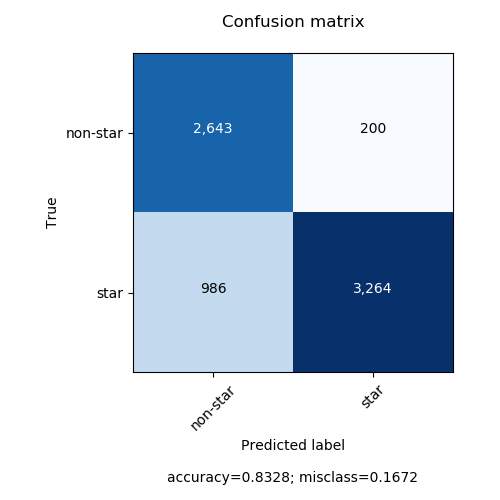

In [16]:
labels = ["non-star", "star"]
cms = confusion_matrix(y_test, y_nb_3)
accuracy = np.trace(cms) / float(np.sum(cms))
misclass = 1 - accuracy

figs = plt.figure(figsize=(5, 5))
cmap = plt.get_cmap('Blues')
plt.imshow(cms, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix\n')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels , rotation=45)
plt.yticks(tick_marks, labels)
plt.ylim(len(cms)-0.5, -0.5)
# plt.colorbar()

thresh = cms.max() / 2
for i, j in itertools.product(range(cms.shape[0]), range(cms.shape[1])):
    plt.text(j, i, "{:,}".format(cms[i, j]), horizontalalignment="center",
             color="white" if cms[i, j] > thresh else "black")

plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.ylabel('True')
plt.tight_layout()
plt.show()

### Result

In [52]:
score_sgd_0 = score(y_test,y_sgd_0,time1_sgd_0 ,time2_sgd_0)
score_sgd_1 = score(y_test,y_sgd_1,time1_sgd_1 ,time2_sgd_1)
score_sgd_2 = score(y_test,y_sgd_2,time1_sgd_2 ,time2_sgd_2)
score_sgd_3 = score(y_test,y_sgd_3,time1_sgd_3 ,time2_sgd_3)
score_sgd_4 = score(y_test,y_sgd_4,time1_sgd_4 ,time2_sgd_4)
score_sgd_5 = score(y_test,y_sgd_5,time1_sgd_5 ,time2_sgd_5)
score_sgd_6 = score(y_test,y_sgd_6,time1_sgd_6 ,time2_sgd_6)
score_sgd_7 = score(y_test,y_sgd_7,time1_sgd_7 ,time2_sgd_7)
score_sgd_8 = score(y_test,y_sgd_8,time1_sgd_8 ,time2_sgd_8)
score_sgd_9 = score(y_test,y_sgd_9,time1_sgd_9 ,time2_sgd_9)
score_sgd_10 = score(y_test,y_sgd_10,time1_sgd_10 ,time2_sgd_10)
score_sgd_11 = score(y_test,y_sgd_11,time1_sgd_11 ,time2_sgd_11)

In [53]:
m1_t = pd.DataFrame({
 'accuracy' : [score_sgd_0[1],score_sgd_1[1],score_sgd_2 [1],score_sgd_3[1],score_sgd_4[1],score_sgd_5[1],score_sgd_6[1],score_sgd_7[1],score_sgd_8[1],score_sgd_9[1],score_sgd_10[1],score_sgd_11[1]],
 'completeness' : [score_sgd_0[2],score_sgd_1[2],score_sgd_2 [2],score_sgd_3[2],score_sgd_4[2],score_sgd_5[2],score_sgd_6[2],score_sgd_7[2],score_sgd_8[2],score_sgd_9[2],score_sgd_10[2],score_sgd_11[2]],
 'contamination' : [score_sgd_0[3],score_sgd_1[3],score_sgd_2 [3],score_sgd_3[3],score_sgd_4[3],score_sgd_5[3],score_sgd_6[3],score_sgd_7[3],score_sgd_8[3],score_sgd_9[3],score_sgd_10[3],score_sgd_11[3]],
 'precision' : [score_sgd_0[4],score_sgd_1[4],score_sgd_2 [4],score_sgd_3[4],score_sgd_4[4],score_sgd_5[4],score_sgd_6[4],score_sgd_7[4],score_sgd_8[4],score_sgd_9[4],score_sgd_10[4],score_sgd_11[4]],
 'recall' : [score_sgd_0[5],score_sgd_1[5],score_sgd_2 [5],score_sgd_3[5],score_sgd_4[5],score_sgd_5[5],score_sgd_6[5],score_sgd_7[5],score_sgd_8[5],score_sgd_9[5],score_sgd_10[5],score_sgd_11[5]],
 'F1 score' : [score_sgd_0[6],score_sgd_1[6],score_sgd_2 [6],score_sgd_3[6],score_sgd_4[6],score_sgd_5[6],score_sgd_6[6],score_sgd_7[6],score_sgd_8[6],score_sgd_9[6],score_sgd_10[6],score_sgd_11[6]],
 'time span' : [score_sgd_0[7],score_sgd_1[7],score_sgd_2 [7],score_sgd_3[7],score_sgd_4[7],score_sgd_5[7],score_sgd_6[7],score_sgd_7[7],score_sgd_8[7],score_sgd_9[7],score_sgd_10[7],score_sgd_11[7]]
                })

m1_t.rename(index = {0: "score_sgd_0", 
                     1: "score_sgd_1",
                     2: "score_sgd_2",
                     3: "score_sgd_3",
                     4: "score_sgd_4",
                     5: "score_sgd_5",
                     6: "score_sgd_6",
                     7: "score_sgd_7",
                     8: "score_sgd_8",
                     9: "score_sgd_9",
                     10: "score_sgd_10",
                     11: "score_sgd_11"
                    },inplace = True)
m1_t

,accuracy,completeness,contamination,precision,recall,F1 score,time span
score_sgd_0,0.965318,0.979943,0.037320,0.962680,0.979943,0.971235,00:00:00.196447
score_sgd_1,0.914282,0.909391,0.054929,0.945071,0.909391,0.926888,00:00:00.512673
score_sgd_2,0.671930,0.718735,0.271466,0.728534,0.718735,0.723601,00:00:00.237856
score_sgd_3,0.966164,0.976640,0.032944,0.967056,0.976640,0.971824,00:00:00.193115
score_sgd_4,0.844495,0.875649,0.134360,0.865640,0.875649,0.870616,00:00:00.443446
score_sgd_5,0.868462,0.876121,0.099005,0.900995,0.876121,0.888384,00:00:01.388785
score_sgd_6,0.956436,0.953516,0.026968,0.973032,0.953516,0.963175,00:00:00.154432
score_sgd_7,0.747920,0.888863,0.259048,0.740952,0.888863,0.808196,00:00:00.256334
score_sgd_8,0.855632,0.876121,0.118471,0.881529,0.876121,0.878817,00:00:01.262509
score_sgd_9,0.936980,0.963426,0.066743,0.933257,0.963426,0.948102,00:00:00.132647


<IPython.core.display.Javascript object>


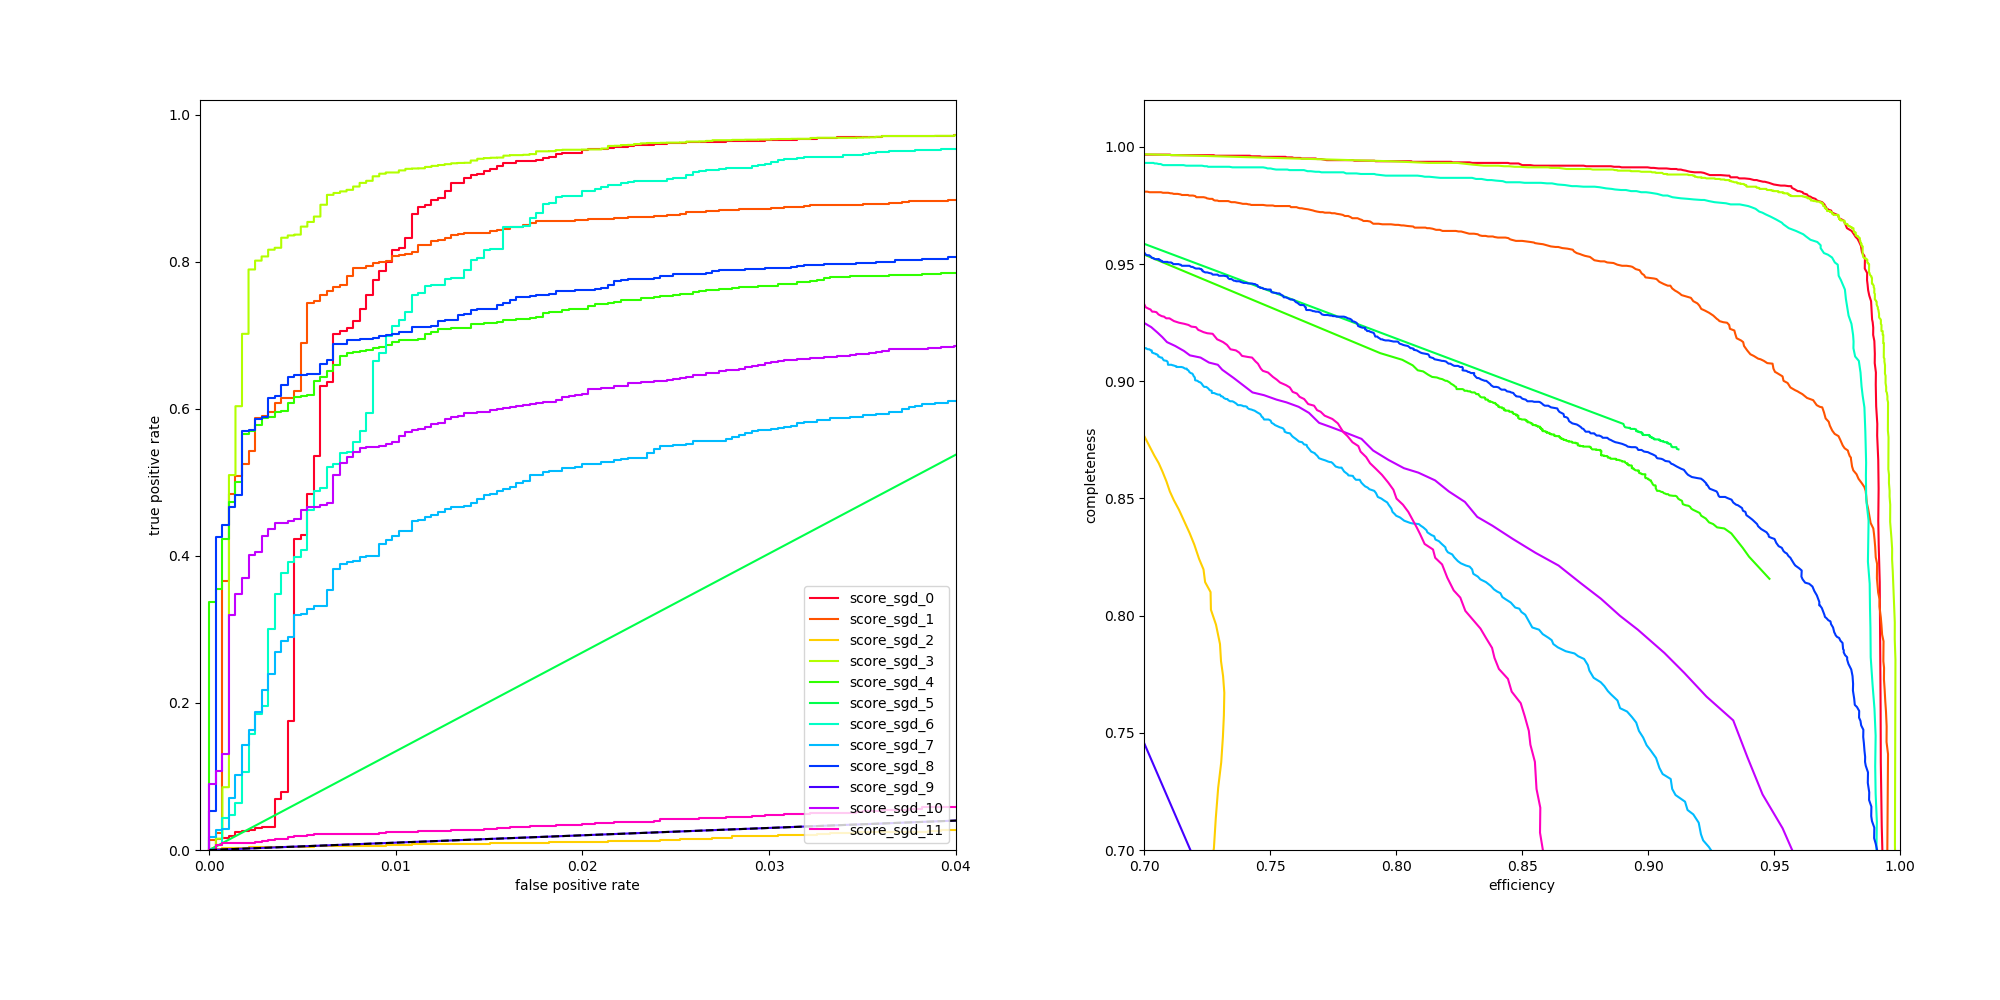

In [58]:
#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)


thresholds = np.linspace(0, 1, 1001)[:-1]

names_model = list(m1_t.index)
probs_model = [y_probs_sgd_0,y_probs_sgd_1,y_probs_sgd_2,y_probs_sgd_3,y_probs_sgd_4,y_probs_sgd_5,y_probs_sgd_6,y_probs_sgd_7,y_probs_sgd_8,y_probs_sgd_9,y_probs_sgd_10,y_probs_sgd_11]
# colors = cm.nipy_spectral(np.linspace(0, 1, len(list(m1_t.index))))
colors = cm.gist_rainbow(np.linspace(0, 1, len(names_model)))
# colors = cm.tab20(np.linspace(0, 1, len(names_model)))

for name, y_prob, c in zip(names_model, probs_model, colors):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=name,color=c)

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=name,color=c)

ax1.set_xlim(-0.0005, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0.7, 1.0)
ax2.set_ylim(0.7, 1.02)

plt.show()